In [104]:
import yfinance as yf
import datetime
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [105]:
# declaring start and end times for the dates of our databases
start = datetime.datetime(1980, 12, 12)
end = datetime.datetime(2023, 12, 31)

# pulling data from yahoo finance databases for Apple and its competitors
apple = yf.download("AAPL", start, end)
samsung = yf.download("005930.KS", start, end)
hpq = yf.download("HPQ", start, end)
lenovo = yf.download("0992.HK", start, end)
dell = yf.download("DVMT", start, end)

# creating dataframes for Apple and competitors
appl = pd.DataFrame(apple)
smsng = pd.DataFrame(samsung)
hp = pd.DataFrame(hpq)
lnvo = pd.DataFrame(lenovo)
dll = pd.DataFrame(dell)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [108]:
# Calculate daily returns
appl_returns = appl['Adj Close'].pct_change().dropna()
smsng_returns = smsng['Adj Close'].pct_change().dropna()
hp_returns = hp['Adj Close'].pct_change().dropna()
lnvo_returns = lnvo['Adj Close'].pct_change().dropna()

# Create dataframes for the returns
appl_returns_df = pd.DataFrame(appl_returns)
smsng_returns_df = pd.DataFrame(smsng_returns)
hp_returns_df = pd.DataFrame(hp_returns)
lnvo_returns_df = pd.DataFrame(lnvo_returns)


# Add a 'Year' column to each dataframe
appl_returns_df['Year'] = appl_returns_df.index.year
smsng_returns_df['Year'] = smsng_returns_df.index.year
hp_returns_df['Year'] = hp_returns_df.index.year
lnvo_returns_df['Year'] = lnvo_returns_df.index.year

# Group by 'Year' and calculate the mean returns for each year
annual_appl_returns = appl_returns_df.groupby('Year')['Adj Close'].mean()
annual_smsng_returns = smsng_returns_df.groupby('Year')['Adj Close'].mean()
annual_hp_returns = hp_returns_df.groupby('Year')['Adj Close'].mean()
annual_lnvo_returns = lnvo_returns_df.groupby('Year')['Adj Close'].mean()



In [109]:
# Creating new variables for 'Adj Close' prices
appl_adj_close = appl['Adj Close'] if 'Adj Close' in appl.columns else appl['Close']
smsng_adj_close = smsng['Adj Close'] if 'Adj Close' in smsng.columns else smsng['Close']
hp_adj_close = hp['Adj Close'] if 'Adj Close' in hp.columns else hp['Close']
lnvo_adj_close = lnvo['Adj Close'] if 'Adj Close' in lnvo.columns else lnvo['Close']
dll_adj_close = dll['Adj Close']


# Creating dataframes for adjusted close prices
appl_adj_close_df = pd.DataFrame(appl_adj_close)
smsng_adj_close_df = pd.DataFrame(smsng_adj_close)
hp_adj_close_df = pd.DataFrame(hp_adj_close)
lnvo_adj_close_df = pd.DataFrame(lnvo_adj_close)
dll_adj_close_df = pd.DataFrame(dll_adj_close)


# Renaming columns for clarity
appl_adj_close_df.columns = ['AAPL']
smsng_adj_close_df.columns = ['SAMSUNG']
hp_adj_close_df.columns = ['HP']
lnvo_adj_close_df.columns = ['LENOVO']
dll_adj_close_df.columns = ['DELL']



# Apple and Samsung

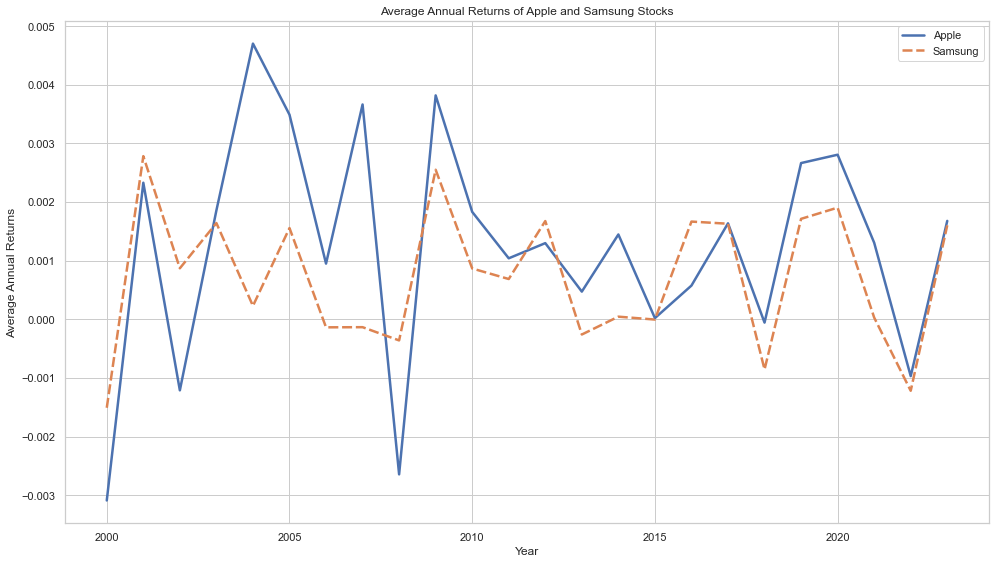

In [110]:
# Combine the data into a single dataframe
s_annual_returns_df = pd.DataFrame({
    'Apple': annual_appl_returns,
    'Samsung': annual_smsng_returns
}).dropna()

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))

# Plotting with seaborn
sns.lineplot(data=s_annual_returns_df, linewidth=2.5)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Annual Returns')
plt.title('Average Annual Returns of Apple and Samsung Stocks')
plt.legend(labels=['Apple', 'Samsung'])
plt.tight_layout()

plt.show()

The graph shows that Apple and Samsung have had volatile annual returns from 2000 to 2024, with Apple's fluctuations being more pronounced. Apple's significant peaks around 2000 and the late 2000s correlate with the launches of the iMac, iPod, and iPhone, driving substantial financial growth. Samsung's returns, while steadier, improved notably with the introduction of the Galaxy series in 2009. Post-2010, Apple's returns show peaks with the launches of the iPad and Apple Watch but also steep declines due to market corrections. Samsung's steady growth reflects its success in the semiconductor business and its Galaxy series, though both companies experienced dips around 2020 due to the COVID-19 pandemic. Overall, Apple's returns are marked by high volatility linked to product innovations, while Samsung shows consistent growth through diversification and steady market presence.

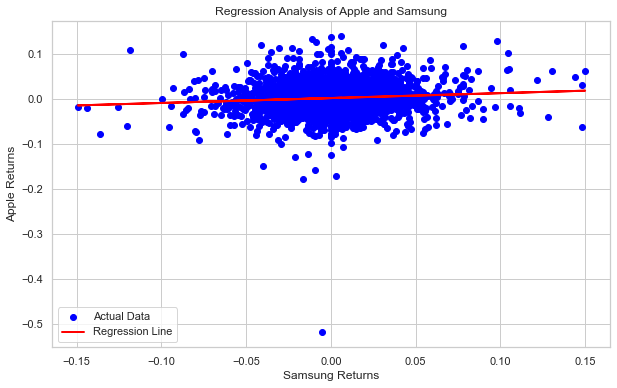

Intercept: 0.0011979027124561896
Coefficient: 0.10900013109982531
R_Squared: 0.009163120309258033


In [111]:
# Merging the dataframes on the dates
s_data = appl_adj_close_df.join(smsng_adj_close_df, how='inner')

# Calculating daily returns
s_returns = s_data.pct_change().dropna()

# Performing linear regression with Lenovo
X = s_returns['SAMSUNG'].values.reshape(-1, 1)
Y = s_returns['AAPL'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
predictions = model.predict(X)

# Calculate R-squared
r_squared = model.score(X, Y)

# Get the coefficients
intercept = model.intercept_
coefficient = model.coef_[0]

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Analysis of Apple and Samsung')
plt.xlabel('Samsung Returns')
plt.ylabel('Apple Returns')
plt.legend()
plt.show()

print(f"Intercept: {intercept}")
print(f"Coefficient: {coefficient}")
print(f"R_Squared: {r_squared}")

The regression analysis between Samsung and Apple returns reveals a relationship characterized by the following parameters: an intercept of 0.0012, a coefficient of 0.1090, and an R-squared value of 0.0092. The intercept indicates that when Samsung returns are zero, Apple's returns are expected to be approximately 0.12%. The coefficient suggests that for every 1% increase in Samsung's returns, Apple's returns increase by about 0.11%. The R-squared value of 0.0092 indicates that only about 0.92% of the variability in Apple's returns can be explained by Samsung's returns. This low R-squared value suggests a weak linear relationship, implying that Samsung's returns are not a strong predictor of Apple's returns, and other factors significantly influence Apple's performance.

# Apple and HP

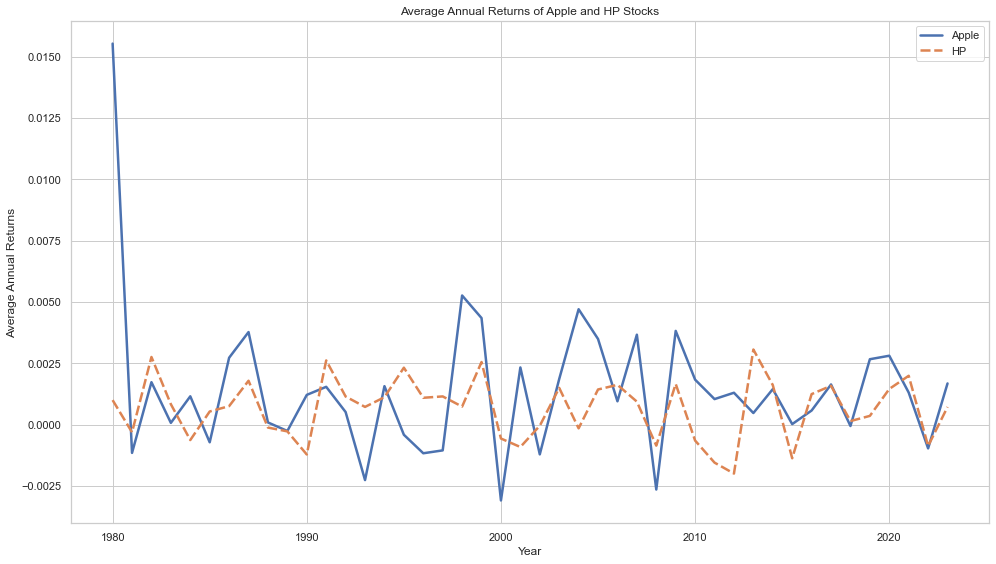

In [112]:
# Combine the data into a single dataframe
hp_annual_returns_df = pd.DataFrame({
    'Apple': annual_appl_returns,
    'HP': annual_hp_returns
}).dropna()

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))

# Plotting with seaborn
sns.lineplot(data=hp_annual_returns_df, linewidth=2.5)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Annual Returns')
plt.title('Average Annual Returns of Apple and HP Stocks')
plt.legend(labels=['Apple', 'HP'])
plt.tight_layout()

plt.show()

The graph shows the average annual returns of Apple and HP stocks from 1980 to 2024, with Apple's returns being highly variable, especially in the early 1980s and early 2000s. Apple's spikes correspond to product launches like the Apple II in 1977 and the iMac in 1998, while HP's returns, though fluctuating, are more stable, reflecting its established presence in the tech sector. In the late 1990s and early 2000s, Apple's sharp returns align with the iPod's release in 2001, driving significant growth. HP's moderate returns during this period maintained a steady presence due to its diverse product lines. Post-2010, Apple's returns continued to fluctuate with major launches like the iPhone and iPad, whereas HP's returns remained relatively stable, showing slight increases during key innovation periods. Overall, Apple's returns are driven by product innovations leading to high variability, while HP's consistent returns reflect a diversified business model.

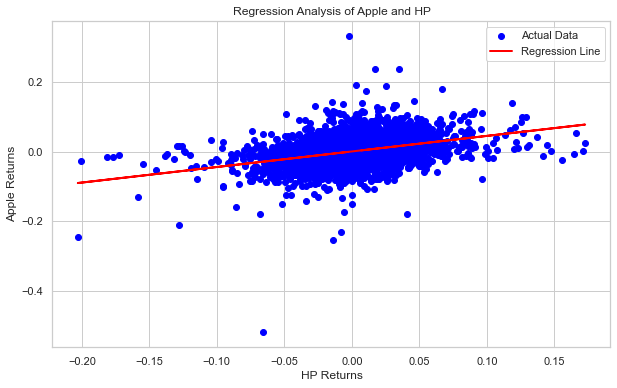

Intercept: 0.0008068890721616721
Coefficient: 0.44638971553949564
R-Squared: 0.1393839790876411


In [113]:
# Merging the dataframes on the dates
data_hp = appl_adj_close_df.join(hp_adj_close_df, how='inner')

# Calculating daily returns
returns_hp = data_hp.pct_change().dropna()

# Performing linear regression with HP
X_hp = returns_hp['HP'].values.reshape(-1, 1)
Y_hp = returns_hp['AAPL'].values

# Create and fit the model
model_hp = LinearRegression()
model_hp.fit(X_hp, Y_hp)

# Make predictions
predictions_hp = model_hp.predict(X_hp)

# Calculate R-squared
r_squared_hp = model_hp.score(X_hp, Y_hp)

# Get the coefficients
intercept_hp = model_hp.intercept_
coefficient_hp = model_hp.coef_[0]

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_hp, Y_hp, color='blue', label='Actual Data')
plt.plot(X_hp, predictions_hp, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Analysis of Apple and HP')
plt.xlabel('HP Returns')
plt.ylabel('Apple Returns')
plt.legend()
plt.show()

print(f"Intercept: {intercept_hp}")
print(f"Coefficient: {coefficient_hp}")
print(f"R-Squared: {r_squared_hp}")

The regression analysis between HP and Apple returns reveals a relationship characterized by an intercept of 0.0008, a coefficient of 0.4464, and an R-squared value of 0.1394. The intercept indicates that when HP returns are zero, Apple's returns are expected to be approximately 0.08%. The coefficient suggests that for every 1% increase in HP's returns, Apple's returns increase by about 0.45%. The R-squared value of 0.1394 indicates that approximately 13.94% of the variability in Apple's returns can be explained by HP's returns. This relatively higher R-squared value compared to other analyses suggests a moderate linear relationship, implying that HP's returns are a somewhat better predictor of Apple's returns, although other factors still play significant roles.

# Apple and Lenovo

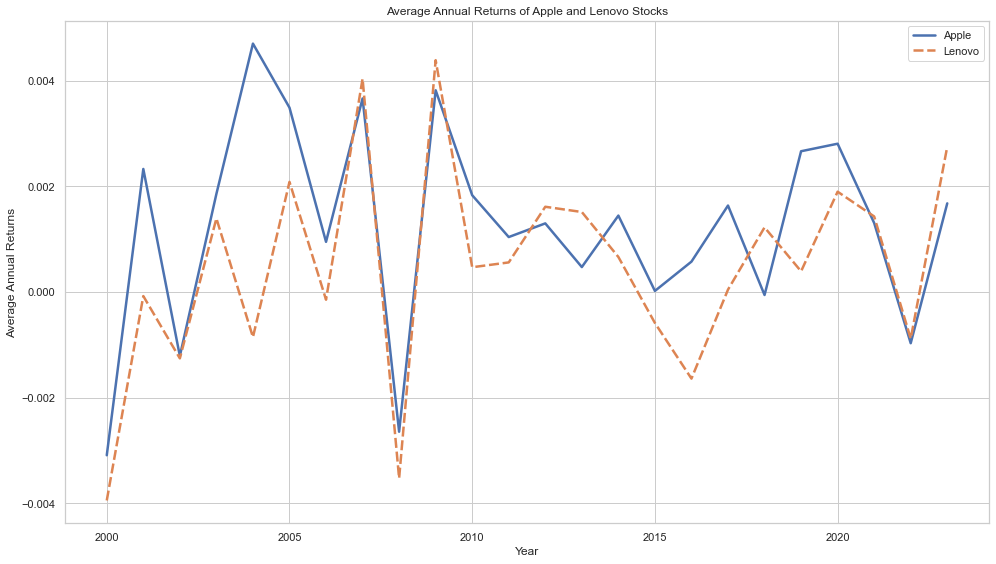

In [114]:
# Combine the data into a single dataframe
l_annual_returns_df = pd.DataFrame({
    'Apple': annual_appl_returns,
    'Lenovo': annual_lnvo_returns
}).dropna()

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))

# Plotting with seaborn
sns.lineplot(data=l_annual_returns_df, linewidth=2.5)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Annual Returns')
plt.title('Average Annual Returns of Apple and Lenovo Stocks')
plt.legend(labels=['Apple', 'Lenovo'])
plt.tight_layout()

plt.show()

The graph shows Apple's and Lenovo's average annual returns from 2000 to 2022, with Apple's returns being highly volatile, especially during key product launches like the iPhone in 2007 and the iPad in 2010, driving substantial growth. Lenovo's returns, while fluctuating, are generally more stable, influenced by strategic moves like the acquisition of IBM's PC division in 2005 and Motorola Mobility in 2014. Post-2010, Apple's volatility continued with the launch of products like the Apple Watch, whereas Lenovo showed more consistent growth linked to its PC and mobile market expansions. Both companies experienced declines in 2008 due to the global financial crisis and in 2020 due to the COVID-19 pandemic, highlighting Apple's innovation-driven volatility and Lenovo's steadier, acquisition-fueled growth.

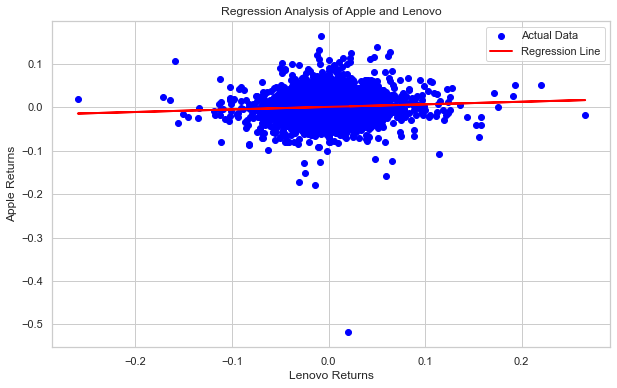

Intercept: 0.0011893502913578175
Coefficient: 0.05904197824345182
R_Squared: 0.004914847896380636


In [115]:
# Merging the dataframes on the dates
l_data = appl_adj_close_df.join(lnvo_adj_close_df, how='inner')

# Calculating daily returns
l_returns = l_data.pct_change().dropna()

# Performing linear regression with Lenovo
X = l_returns['LENOVO'].values.reshape(-1, 1)
Y = l_returns['AAPL'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
predictions = model.predict(X)

# Calculate R-squared
r_squared = model.score(X, Y)

# Get the coefficients
intercept = model.intercept_
coefficient = model.coef_[0]

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Analysis of Apple and Lenovo')
plt.xlabel('Lenovo Returns')
plt.ylabel('Apple Returns')
plt.legend()
plt.show()

print(f"Intercept: {intercept}")
print(f"Coefficient: {coefficient}")
print(f"R_Squared: {r_squared}")

The regression analysis reveals a very weak relationship between Apple's and Lenovo's stock returns. The intercept is 0.00119, meaning Apple's returns are expected to be 0.119% when Lenovo's returns are zero. The coefficient of 0.0590 indicates a minimal positive correlation; for every 1% increase in Lenovo's returns, Apple's returns increase by about 0.059%. The R-squared value of 0.0049 shows that only 0.49% of the variance in Apple's returns can be explained by Lenovo's returns, highlighting an extremely weak linear relationship. This very low correlation suggests that Lenovo's stock performance is not a significant predictor of Apple's stock performance, with their returns not closely linked. The scatter plot and regression line confirm this weak relationship, as the data points are widely scattered around the regression line.

# Apple and Dell

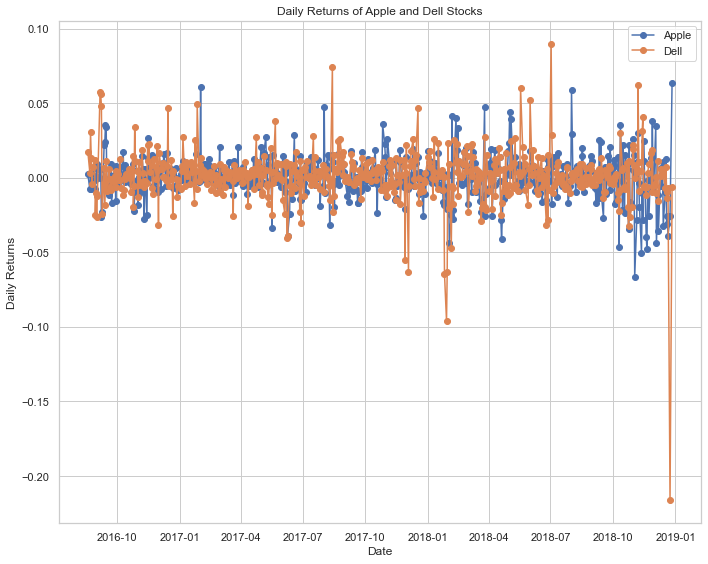

In [116]:
# Assuming 'appl' and 'dll' are your dataframes with 'Adj Close' prices for Apple and Dell
# Rename the 'Adj Close' columns for clarity
appl.rename(columns={'Adj Close': 'AAPL'}, inplace=True)
dll.rename(columns={'Adj Close': 'DELL'}, inplace=True)

# Find the common date range
common_dates = appl.index.intersection(dll.index)

# Filter both dataframes to the common date range
appl_common = appl.loc[common_dates]
dll_common = dll.loc[common_dates]

# Calculate daily returns
appl_returns = appl_common['AAPL'].pct_change().dropna()
dll_returns = dll_common['DELL'].pct_change().dropna()

# Merge the returns into a single dataframe
returns_df = pd.DataFrame({'AAPL': appl_returns, 'DELL': dll_returns})

# Plotting the returns
plt.figure(figsize=(10, 8))

plt.plot(returns_df.index, returns_df['AAPL'], marker='o', linestyle='-', label='Apple')
plt.plot(returns_df.index, returns_df['DELL'], marker='o', linestyle='-', label='Dell')

plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns of Apple and Dell Stocks')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

The graph shows the daily returns of Apple and Dell stocks from late 2016 to early 2019. Apple's returns, depicted in blue, exhibit high fluctuations with significant positive and negative spikes, often driven by major product launches like the iPhone X in November 2017. Dell's returns, shown in orange, also display considerable variations, influenced by strategic business moves such as the EMC acquisition in 2016. The pronounced dip in Dell's returns at the end of 2018 may reflect broader market conditions affecting tech stocks. Unlike the yearly analysis in other graphs, Dell's returns are analyzed daily due to its shorter time as a public company during this period. Overall, Apple's return variations are closely tied to its innovation cycles and product releases, while Dell's returns are more influenced by strategic corporate actions and market trends.

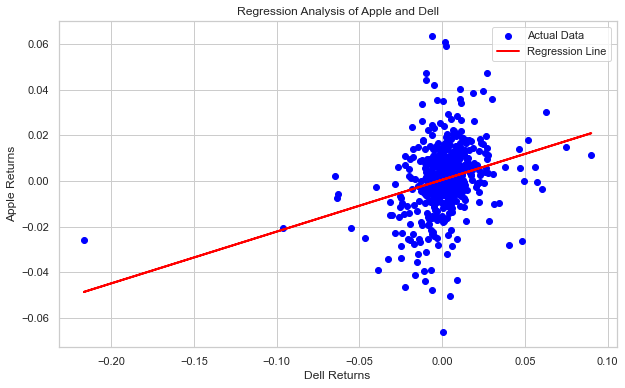

Intercept: 0.0004942709304718179
Coefficient: 0.2267277999585409
R_Squared: 0.07738459829965749


In [117]:
# Merging the dataframes on the dates
data_dll = appl_adj_close_df.join(dll_adj_close_df, how='inner')

# Calculating daily returns
returns_dll = data_dll.pct_change().dropna()

# Performing linear regression with Dell
X = returns_dll['DELL'].values.reshape(-1, 1)
Y = returns_dll['AAPL'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
predictions = model.predict(X)

# Calculate R-squared
r_squared = model.score(X, Y)

# Get the coefficients
intercept = model.intercept_
coefficient = model.coef_[0]

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Analysis of Apple and Dell')
plt.xlabel('Dell Returns')
plt.ylabel('Apple Returns')
plt.legend()
plt.show()

print(f"Intercept: {intercept}")
print(f"Coefficient: {coefficient}")
print(f"R_Squared: {r_squared}")

The regression analysis reveals a moderate relationship between Apple's and Dell's stock returns. The intercept is 0.00049, meaning Apple's returns are expected to be 0.049% when Dell's returns are zero. The coefficient of 0.2267 indicates a weak positive correlation; for every 1% increase in Dell's returns, Apple's returns increase by about 0.23%. The R-squared value of 0.0774 shows that only 7.74% of the variance in Apple's returns can be explained by Dell's returns, highlighting a weak linear relationship. This low correlation suggests that Dell's stock performance is not a strong predictor of Apple's stock performance, with their returns not closely linked. The scatter plot and regression line confirm this weak relationship, as the data points are widely scattered around the regression line.